In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_mat = pd.read_pickle('df_mat-modelling-RFE-range_G3_5-repaired_G3_0_values.pkl')

df_mat.head()

,sex,address,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,famsup,paid,higher,internet,romantic,goout,health,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G3
0,1,1,1,0,4,4,2,1,0,0,1,0,0,4,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,2
1,1,1,1,1,1,1,2,0,1,0,1,1,0,3,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2
2,1,1,0,1,1,1,2,1,0,1,1,1,0,2,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3
3,1,1,1,1,4,2,3,0,1,1,1,1,1,2,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,4
4,1,1,1,1,3,3,2,0,1,1,1,0,0,2,5,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,3


In [3]:
df_mat.shape

(395, 33)

In [4]:
X = np.array(df_mat.drop('G3',axis = 1))
y = np.array(df_mat['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression 

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.157227,3
1,2.296875,3
2,2.781250,2
3,3.165039,3
4,3.097656,3


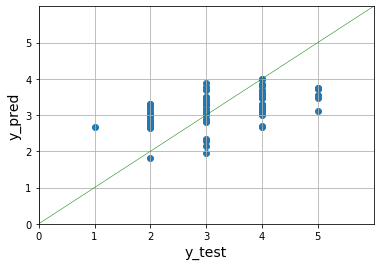

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

0.8281586364372684

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.99537,3
1,2.99537,3
2,2.99537,2
3,2.99537,3
4,2.99537,3


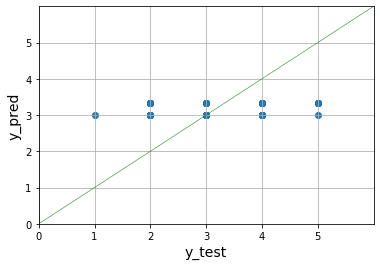

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [18]:
rmse(y_pred,y_test)

0.907117498202486

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.642256,3
1,2.718462,3
2,3.062595,2
3,2.968194,3
4,2.894454,3


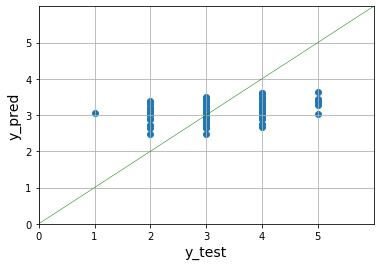

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [24]:
rmse(y_pred,y_test)

0.8782189392108342

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.324256,3
1,2.555485,3
2,2.953563,2
3,2.903142,3
4,2.961991,3


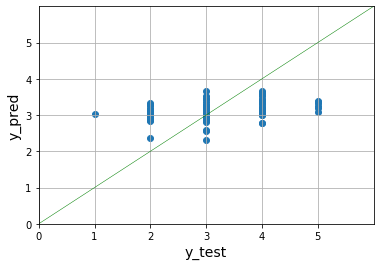

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [30]:
rmse(y_pred,y_test)

0.8832406619073533

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(316, 32)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 64,epochs = 100)

Train on 316 samples, validate on 79 samples
Epoch 1/100
316/316 [==============================] - 1s 3ms/sample - loss: 11.1509 - val_loss: 10.8079
Epoch 2/100
316/316 [==============================] - 0s 89us/sample - loss: 10.1676 - val_loss: 10.1128
Epoch 3/100
316/316 [==============================] - 0s 85us/sample - loss: 9.2647 - val_loss: 9.3943
Epoch 4/100
316/316 [==============================] - 0s 79us/sample - loss: 8.4022 - val_loss: 8.4705
Epoch 5/100
316/316 [==============================] - 0s 82us/sample - loss: 7.2634 - val_loss: 7.2395
Epoch 6/100
316/316 [==============================] - 0s 82us/sample - loss: 6.0821 - val_loss: 5.6353
Epoch 7/100
316/316 [==============================] - 0s 79us/sample - loss: 4.2369 - val_loss: 3.7305
Epoch 8/100
316/316 [==============================] - 0s 85us/sample - loss: 2.8431 - val_loss: 1.9954
Epoch 9/100
316/316 [==============================] - 0s 82us/sample - loss: 2.4338 - val_loss: 1.2339
Epoch 10/100
316

316/316 [==============================] - 0s 82us/sample - loss: 0.9769 - val_loss: 1.1948
Epoch 79/100
316/316 [==============================] - 0s 85us/sample - loss: 1.0019 - val_loss: 1.2223
Epoch 80/100
316/316 [==============================] - 0s 85us/sample - loss: 1.0596 - val_loss: 1.2869
Epoch 81/100
316/316 [==============================] - 0s 79us/sample - loss: 1.0441 - val_loss: 1.3185
Epoch 82/100
316/316 [==============================] - 0s 85us/sample - loss: 1.0826 - val_loss: 1.2477
Epoch 83/100
316/316 [==============================] - 0s 85us/sample - loss: 1.0518 - val_loss: 1.1478
Epoch 84/100
316/316 [==============================] - 0s 79us/sample - loss: 1.0538 - val_loss: 1.1739
Epoch 85/100
316/316 [==============================] - 0s 89us/sample - loss: 1.1282 - val_loss: 1.2685
Epoch 86/100
316/316 [==============================] - 0s 92us/sample - loss: 0.9352 - val_loss: 1.3078
Epoch 87/100
316/316 [==============================] - 0s 95us/samp

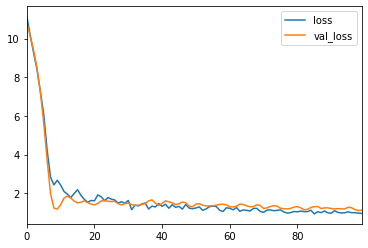

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,2.134932,3
1,2.156993,3
2,2.500666,2
3,3.124508,3
4,3.030946,3


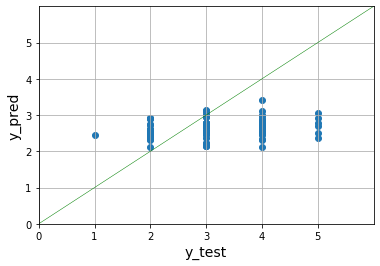

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [41]:
rmse(y_pred,y_test)

1.0631067984995708

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 100,max_depth = 1)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 10,max_depth = 30,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 64,epochs = 100)

Train on 316 samples, validate on 158 samples
Epoch 1/100
316/316 [==============================] - 1s 2ms/sample - loss: 8.3531 - val_loss: 7.8058
Epoch 2/100
316/316 [==============================] - 0s 89us/sample - loss: 6.8152 - val_loss: 6.0068
Epoch 3/100
316/316 [==============================] - 0s 89us/sample - loss: 5.1927 - val_loss: 4.2218
Epoch 4/100
316/316 [==============================] - 0s 82us/sample - loss: 3.6739 - val_loss: 2.6112
Epoch 5/100
316/316 [==============================] - 0s 82us/sample - loss: 2.9877 - val_loss: 1.5293
Epoch 6/100
316/316 [==============================] - 0s 89us/sample - loss: 2.7777 - val_loss: 1.1241
Epoch 7/100
316/316 [==============================] - 0s 82us/sample - loss: 2.5627 - val_loss: 1.0781
Epoch 8/100
316/316 [==============================] - 0s 89us/sample - loss: 2.6290 - val_loss: 1.2225
Epoch 9/100
316/316 [==============================] - 0s 89us/sample - loss: 2.6620 - val_loss: 1.5469
Epoch 10/100
316/31

316/316 [==============================] - 0s 85us/sample - loss: 0.9700 - val_loss: 1.0967
Epoch 79/100
316/316 [==============================] - 0s 85us/sample - loss: 1.1116 - val_loss: 1.0160
Epoch 80/100
316/316 [==============================] - 0s 95us/sample - loss: 0.9861 - val_loss: 0.8850
Epoch 81/100
316/316 [==============================] - 0s 104us/sample - loss: 0.9611 - val_loss: 0.8533
Epoch 82/100
316/316 [==============================] - 0s 92us/sample - loss: 0.9158 - val_loss: 0.8512
Epoch 83/100
316/316 [==============================] - 0s 89us/sample - loss: 1.0392 - val_loss: 0.9269
Epoch 84/100
316/316 [==============================] - 0s 82us/sample - loss: 1.0441 - val_loss: 0.9054
Epoch 85/100
316/316 [==============================] - 0s 82us/sample - loss: 0.9906 - val_loss: 0.9072
Epoch 86/100
316/316 [==============================] - 0s 89us/sample - loss: 1.0330 - val_loss: 0.9389
Epoch 87/100
316/316 [==============================] - 0s 89us/sam

In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,3.202532,3.381116,3.179105,2.649421
1,3.202532,3.236324,3.519797,2.439381
2,3.202532,3.523419,3.471970,2.660402
3,3.202532,2.830705,3.103093,2.371283
4,3.202532,3.092715,3.041974,2.600362


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,3.202532,2.945532,2.249026,2.207675
1,3.202532,3.033072,2.567195,3.116466
2,3.202532,3.226404,3.267672,2.405627
3,3.202532,2.861509,2.862114,2.844582
4,3.202532,3.159869,3.272926,3.628679


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,2.261706,3
1,4.190090,3
2,2.385924,2
3,3.345092,3
4,5.073716,3


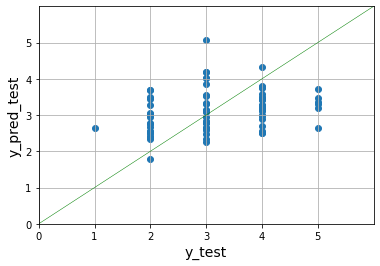

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [53]:
rmse(y_pred_test,y_test)

0.9521891144768891

In [54]:
mean_absolute_error(y_pred_test,y_test)

0.7964795256151581